In [9]:
import sys
sys.path.append('../')
import importlib
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp
import matplotlib.pyplot as plt
import matplotlib

# Cost Sensitivity Analysis

In [8]:
output_file = 'cost_ratio_04_10min'
number_aircrafts_lp(schedule='schedule_10min_0610', schedule_time_step=288, output_path=output_file, tau= variable_cost=0)
specificn, specificu, specificc = convert2df('output_file')
print('Total # of flights is', specificu['amount'].sum())

NameError: name 'convert2df' is not defined

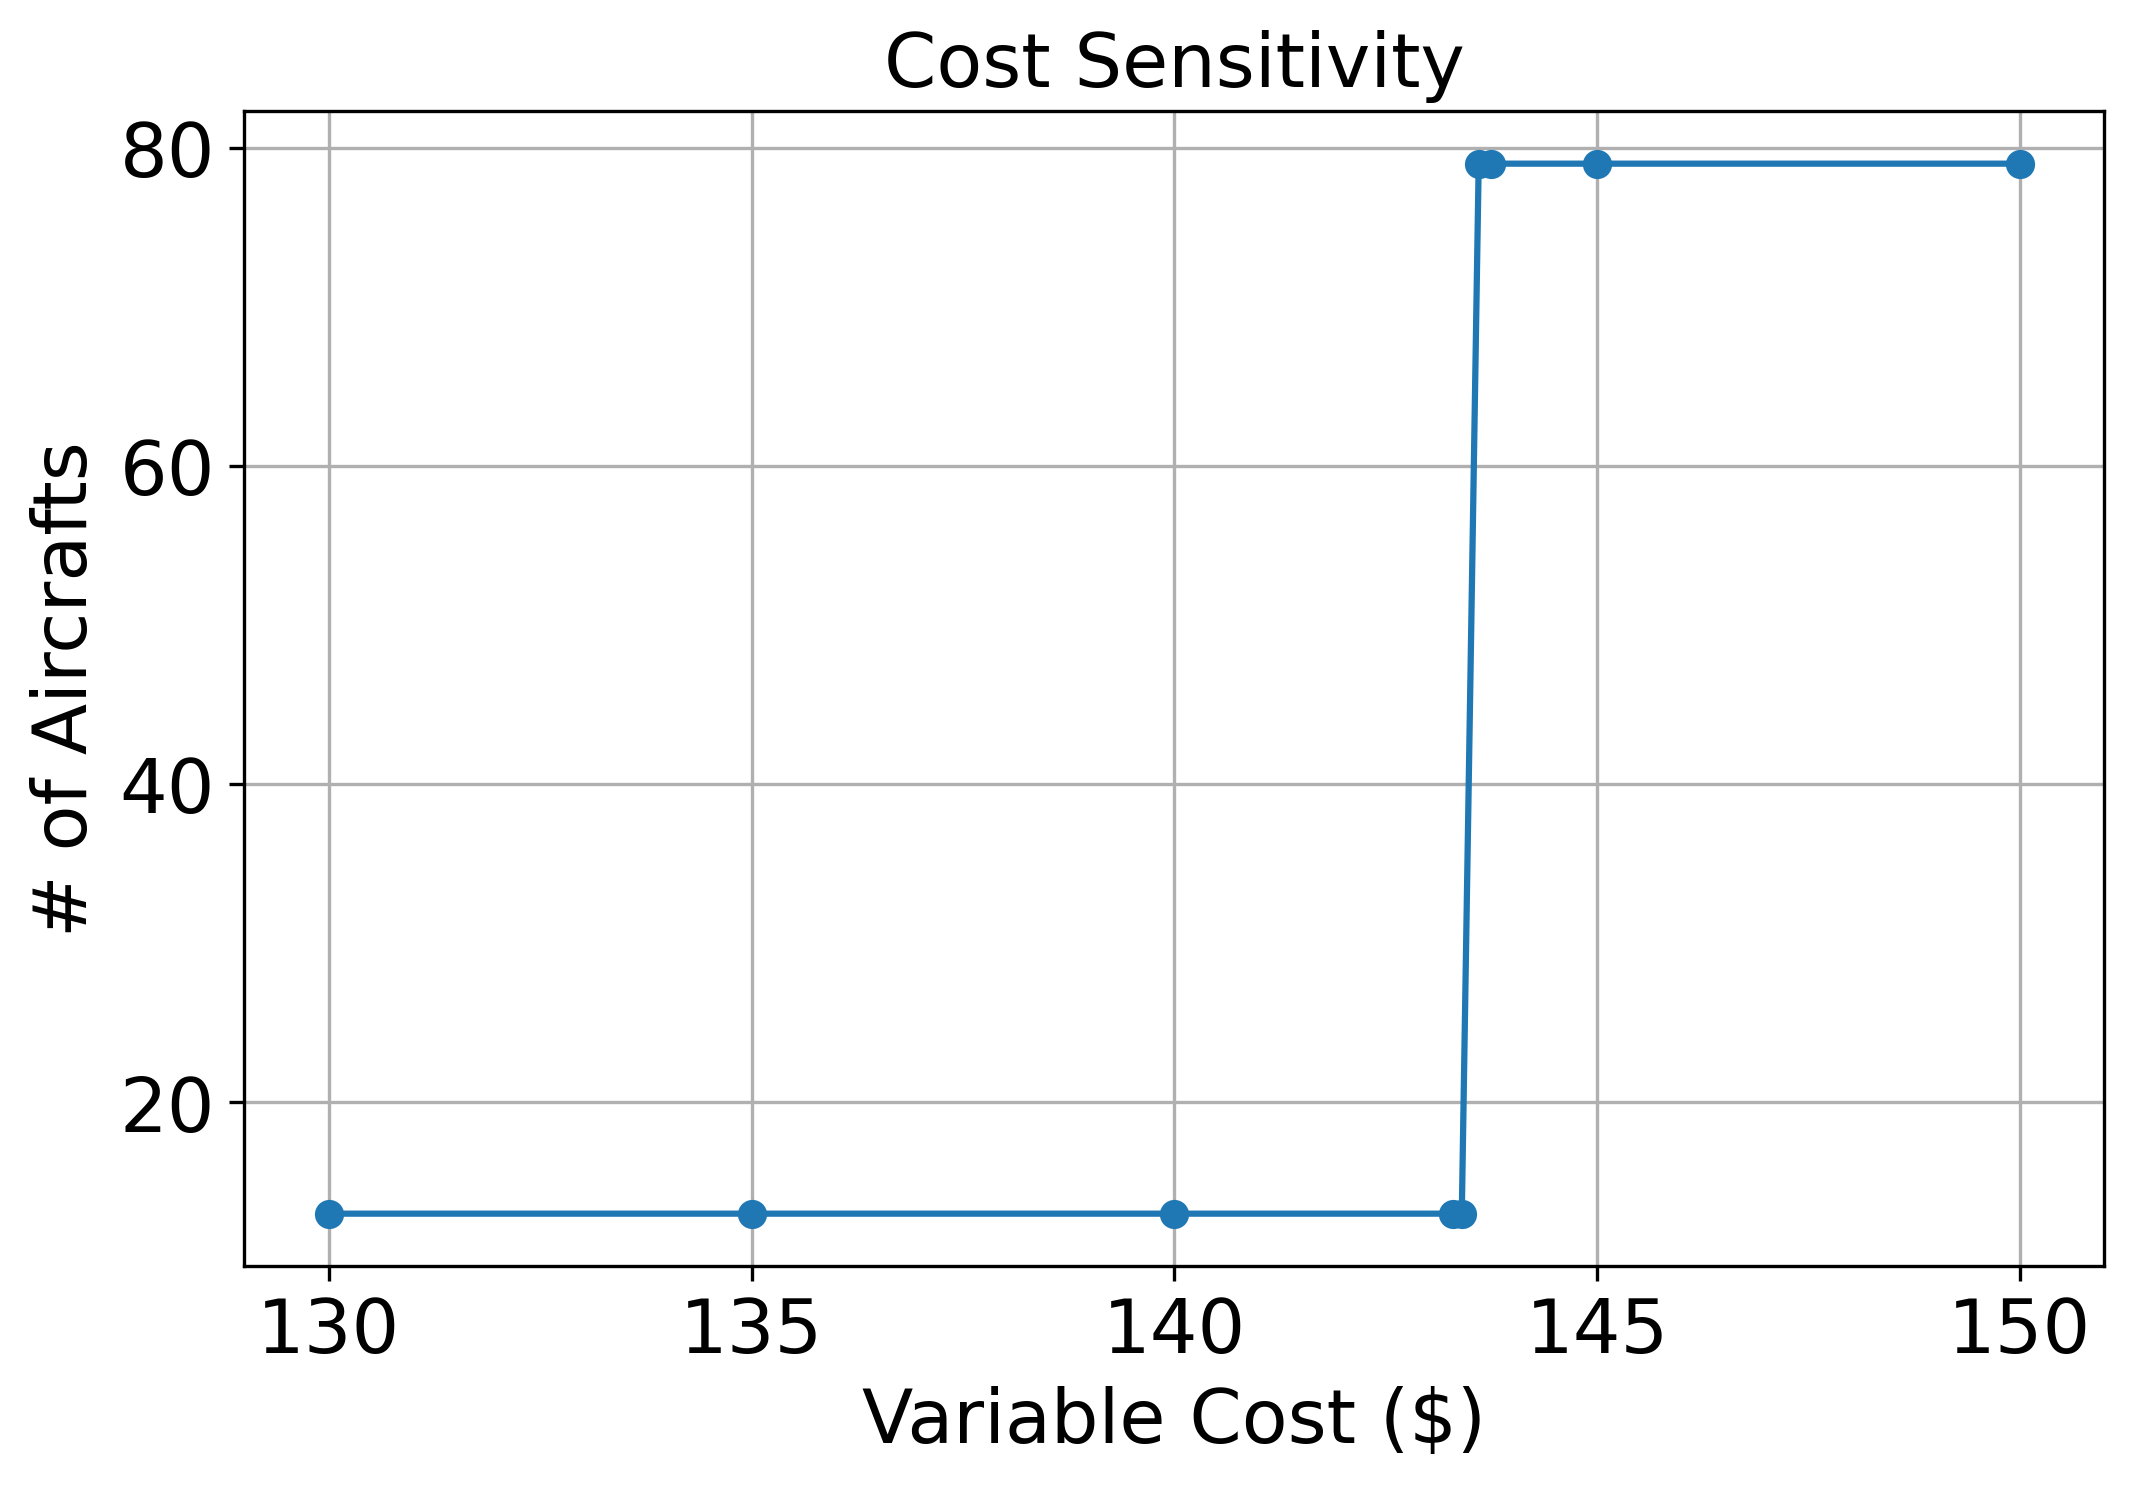

In [24]:
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 18
fig, ax = plt.subplots(figsize=(8,5))
vc = [130, 135, 140, 143.3, 143.4, 143.6, 143.75, 145, 150]
n = [13, 13, 13, 13, 13, 79,79,79,79]
ax.plot(vc,n,marker='o')
ax.set(xlabel='Variable Cost ($)', 
       ylabel='# of Aircrafts',
       title='Cost Sensitivity')
plt.grid()
plt.gcf().set_dpi(300)

In [27]:
schedule = pd.read_csv('../input/schedule_5min_0612.csv')
schedule.shape

(771, 2)

In [52]:
specificn, specificu60, specificc = convert2df('output_60_miles_5min_DTLA_charging')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

In [34]:
def find_repo_flights(specificu):

    lp_out = specificu.groupby(['t', 'i']).sum('amount').reset_index()
    lp_out.loc[lp_out['i'] == 0, 'i'] = 'LAX_DTLA'
    lp_out.loc[lp_out['i'] == 1, 'i'] = 'DTLA_LAX'
    schedule = pd.read_csv('../input/schedule_5min_0612.csv')
    schedule['schedule'] = np.ceil(schedule['schedule'] / 5)
    schedule = schedule.groupby(['schedule', 'od']).size().reset_index()
    schedule.columns = ['schedule', 'od', 'schedule_amount']
    merged = schedule.merge(lp_out, how='outer',left_on=['od','schedule'], right_on=['i', 't'])
    merged['repo'] = merged['amount'] - merged['schedule_amount']

    return merged

In [53]:
merged36 = find_repo_flights(specificu=specificu36)
merged48 = find_repo_flights(specificu=specificu48)
merged60 = find_repo_flights(specificu=specificu60)

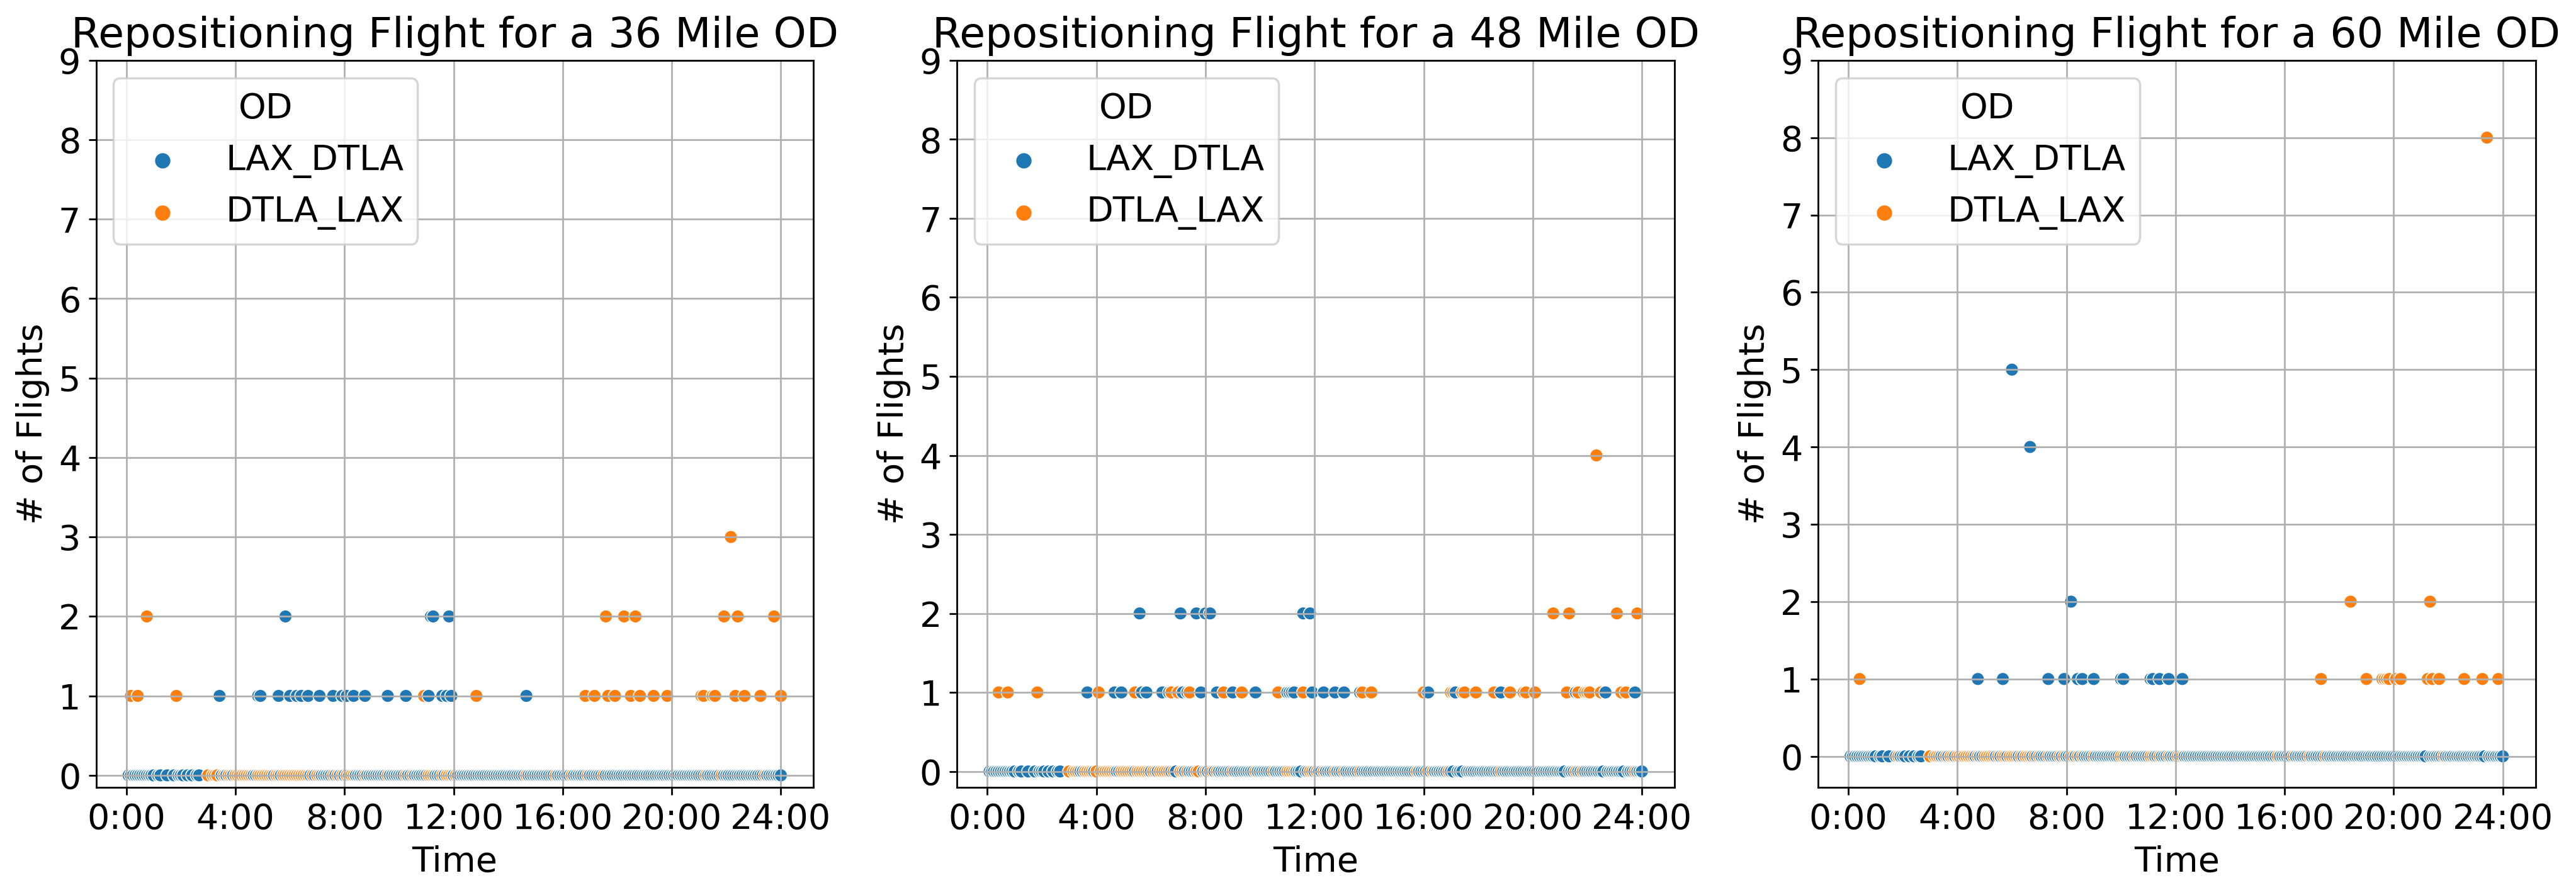

In [69]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(20,6), ncols=3)
sns.scatterplot(merged36, x='t', y='repo', hue='i', ax=ax[0])
sns.scatterplot(merged48, x='t', y='repo', hue='i', ax=ax[1])
sns.scatterplot(merged60, x='t', y='repo', hue='i', ax=ax[2])
for i in range(3):
       ax[i].set(xlabel='Time',
              ylabel='# of Flights',
              yticks=np.arange(0,10),
              xticks=np.arange(0,288+12*4, 12*4),
              xticklabels = [str(i)+':00' for i in range(0, 28, 4)])
       ax[i].grid()
       ax[i].legend(title='OD', loc='upper left')
ax[0].set(title='Repositioning Flight for a 36 Mile OD')
ax[1].set(title='Repositioning Flight for a 48 Mile OD')
ax[2].set(title='Repositioning Flight for a 60 Mile OD')


plt.gcf().set_dpi(250)



# Hypothetical Flight Distance

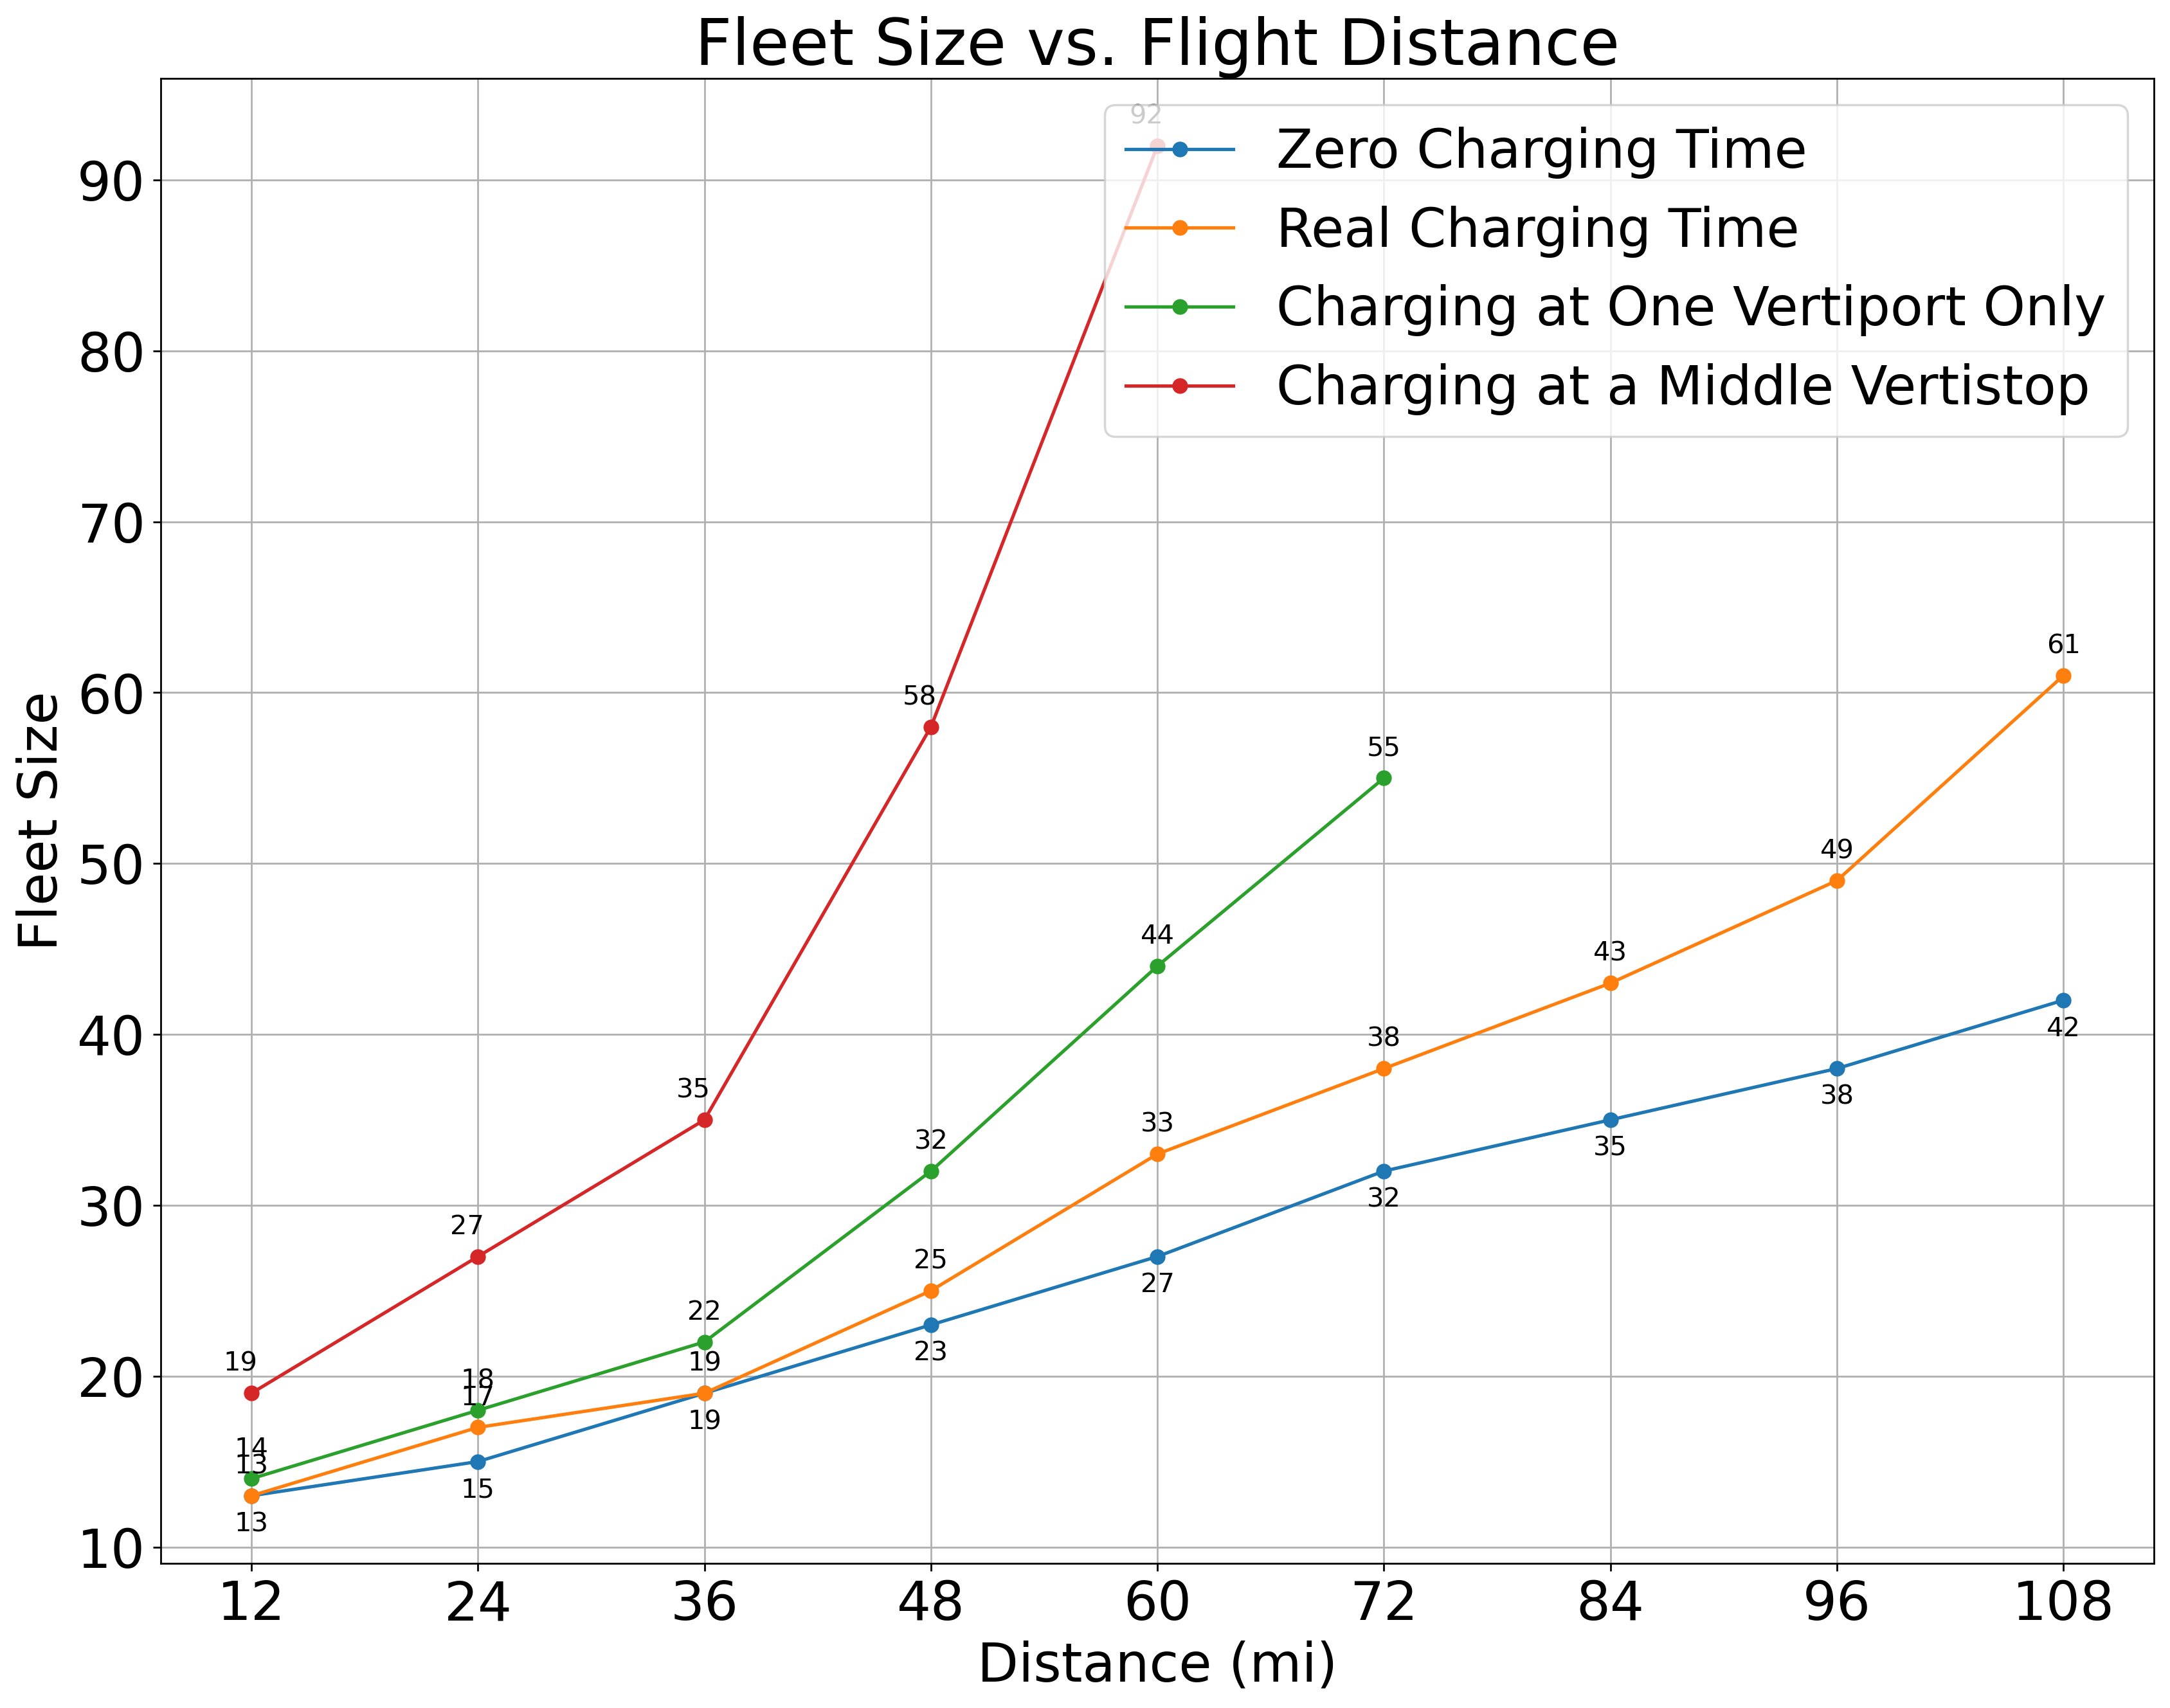

In [103]:
zero_charge = [13,15,19,23,27,32,35,38,42]
real_charge = [13,17,19,25,33,38,43,49,61]
dtla_charge = [14,18,22,32,44,55]
mid = [19,27,35,58,92]
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(np.arange(12,120,12), zero_charge, marker='o',
         label='Zero Charging Time')
ax.plot(np.arange(12,120,12), real_charge, marker='o',
         label='Real Charging Time')
ax.plot(np.arange(12,84,12), dtla_charge, marker='o',
         label='Charging at One Vertiport Only')
ax.plot(np.arange(12,72,12), mid, marker='o',
         label='Charging at a Middle Vertistop')

for i in range(len(zero_charge)):
    plt.annotate(zero_charge[i], (np.arange(12,120,12)[i], zero_charge[i]), textcoords="offset points", xytext=(0,-16), ha='center', fontsize=12)
for i in range(len(real_charge)):
    plt.annotate(real_charge[i], (np.arange(12,120,12)[i], real_charge[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
for i in range(len(dtla_charge)):
    plt.annotate(dtla_charge[i], (np.arange(12,84,12)[i], dtla_charge[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
for i in range(len(mid)):
    plt.annotate(mid[i], (np.arange(12,72,12)[i], mid[i]), textcoords="offset points", xytext=(-5,10), ha='center', fontsize=12)
ax.set(xlabel='Distance (mi)',
       ylabel='Fleet Size',
       xticks=np.arange(12,120,12),
       title='Fleet Size vs. Flight Distance')
plt.grid()
plt.legend()
plt.gcf().set_dpi(250)


# Import Helper Functions

In [10]:
import model.ParseLP
importlib.reload(model.ParseLP)
from model.ParseLP import convert2df, calculate_num_aircrafts

# Testing

<AxesSubplot:xlabel='t', ylabel='amount'>

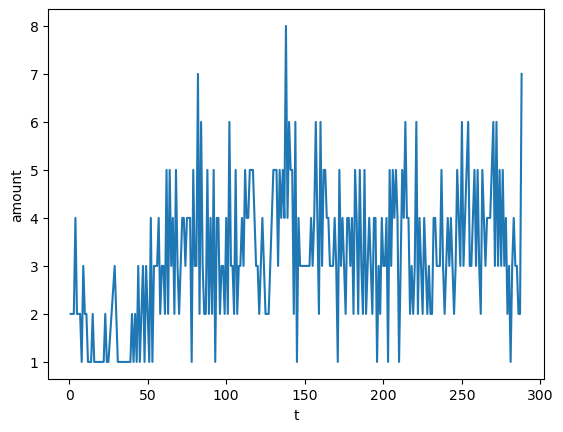

In [190]:
# output_file = 'variable_values'
output_file = 'cost_ratio_04'
specificn, specificu, specificc = convert2df(output_file)
test = specificu.groupby('t').sum('amount').reset_index()
sns.lineplot(x=test['t'], y=test['amount'])

In [176]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [177]:
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01)
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10)
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn)

# State Visulization

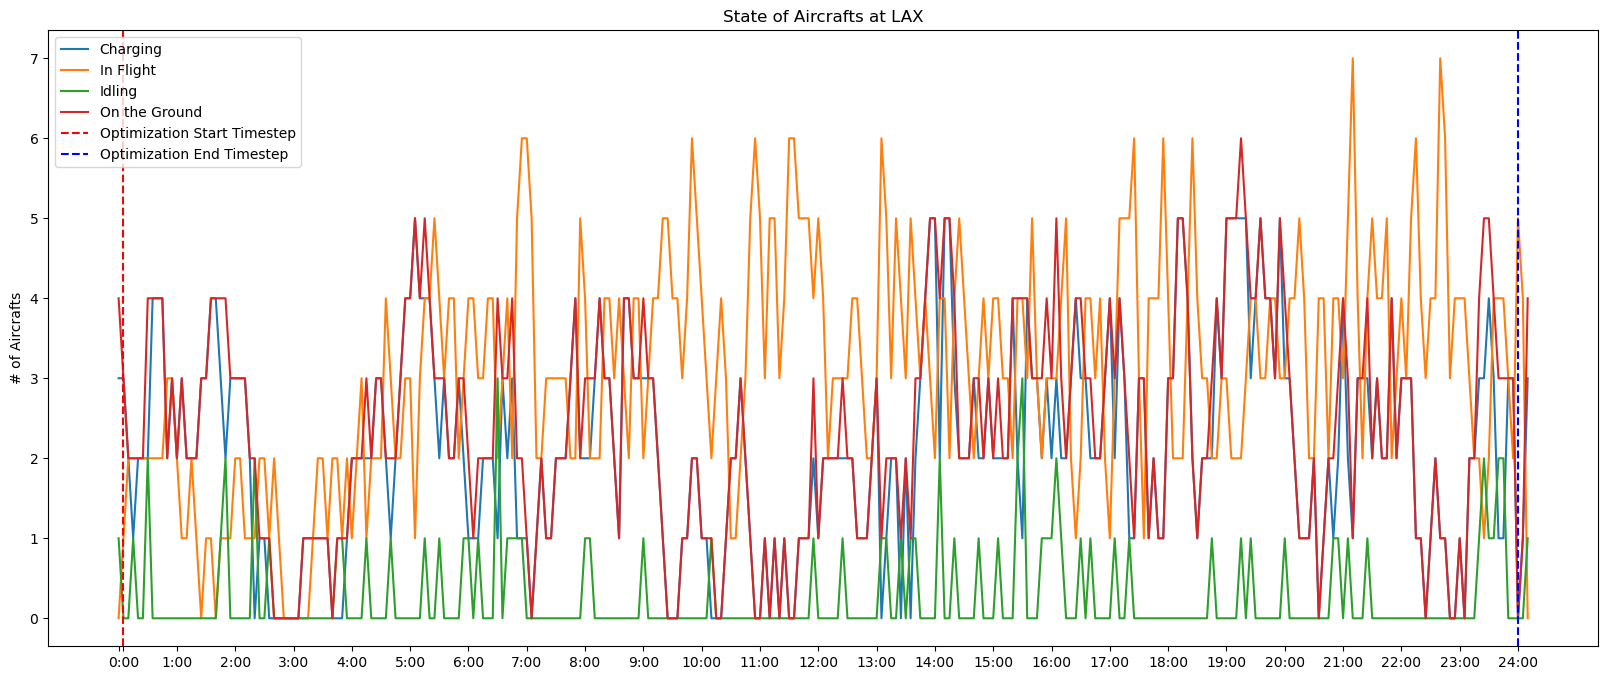

In [178]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [179]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][290], '; u=', lax_all_u.sum(axis=0)[x0:x1][290], '; n=', lax_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 3.0 ; u= 0.0 ; n= 1.0
At t = 290, c = 3.0 ; u= 0.0 ; n= 1.0


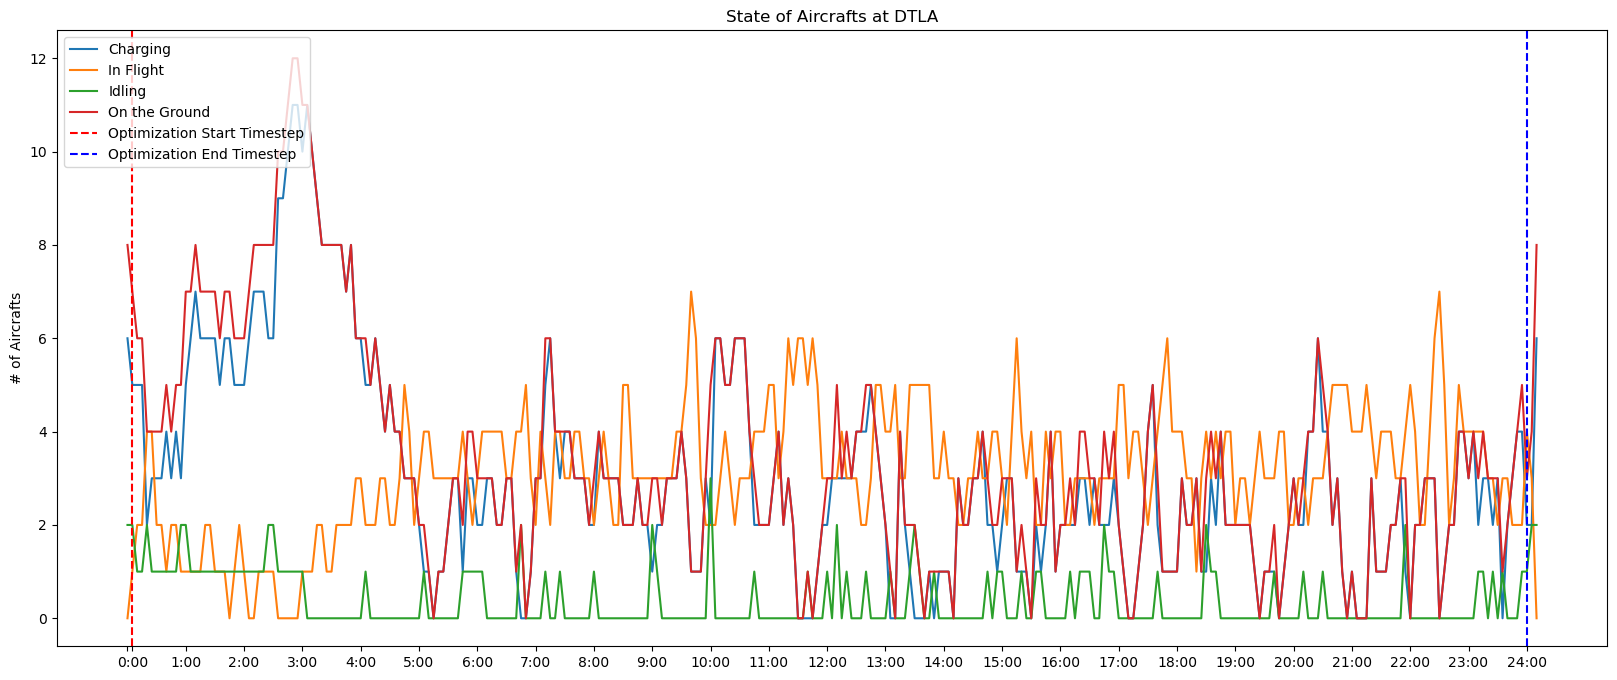

In [180]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(dtla_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(dtla_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(dtla_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((dtla_all_c.sum(axis=0)[x0:x1] + dtla_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at DTLA',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [181]:
print('At t = 0, c =', dtla_all_c.sum(axis=0)[x0:x1][0], '; u=', dtla_all_u.sum(axis=0)[x0:x1][0], '; n=', dtla_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', dtla_all_c.sum(axis=0)[x0:x1][290], '; u=', dtla_all_u.sum(axis=0)[x0:x1][290], '; n=', dtla_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 6.0 ; u= 0.0 ; n= 2.0
At t = 290, c = 6.0 ; u= 0.0 ; n= 2.0


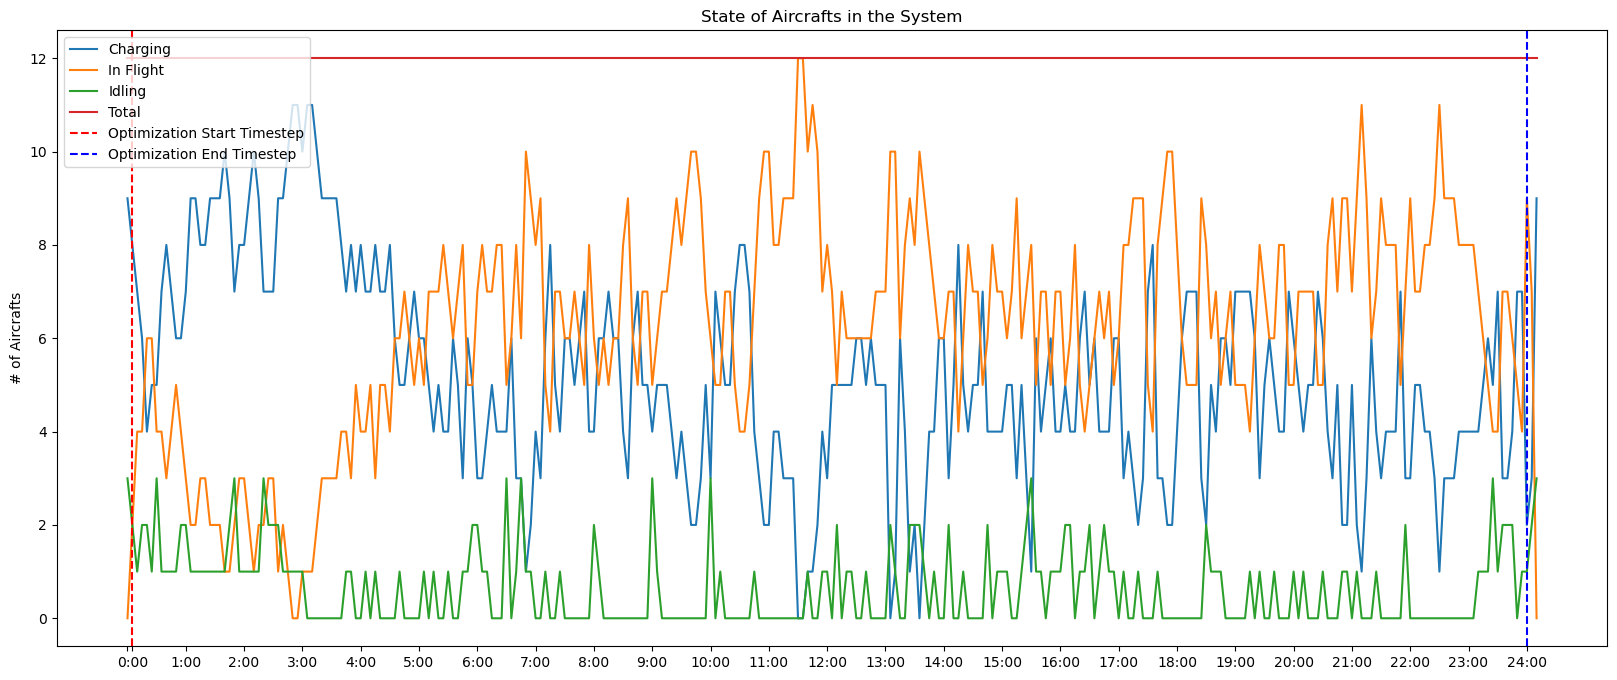

In [182]:
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [183]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][290], '; u=', all_u.sum(axis=0)[x0:x1][290], '; n=', all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 9.0 ; u= 0.0 ; n= 3.0
At t = 290, c = 9.0 ; u= 0.0 ; n= 3.0


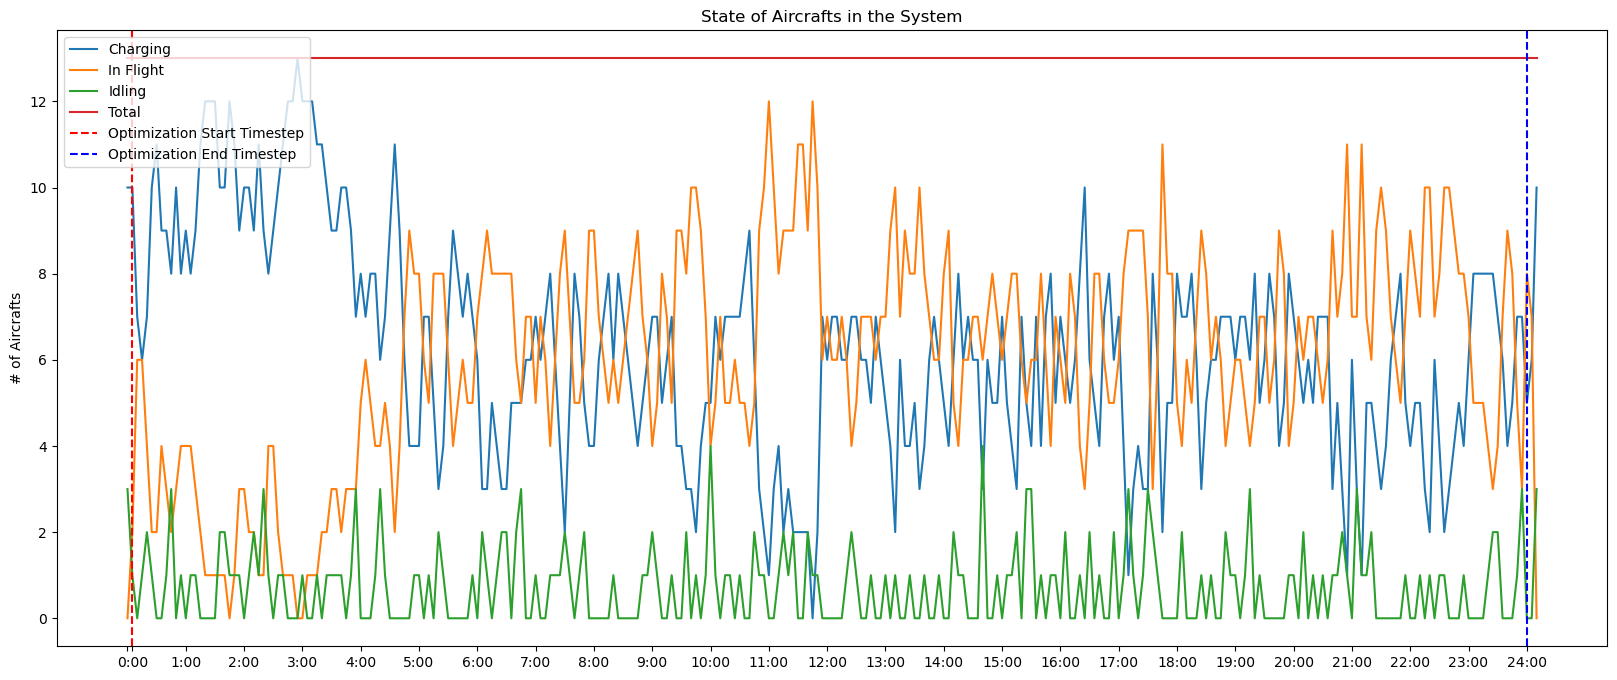

In [186]:
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn)
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

<AxesSubplot:xlabel='t', ylabel='amount'>

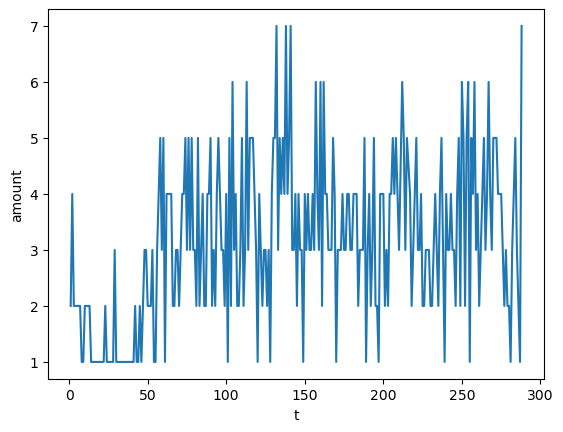

In [189]:
test = specificu.groupby('t').sum('amount').reset_index()
sns.lineplot(x=test['t'], y=test['amount'])

# Cost Ratio Analysis

In [21]:
# A flight cost is 100 dollars, an aircraft is 2.2M


cost_ratio = np.array([0.3, 0.4, 0.5, 0.55, 0.6])
num_aircraft = np.array([12, 12, 19, 75, 75])

[Text(0.5, 0, 'Cost per Flight / Per Aircraft Ownership'),
 Text(0, 0.5, 'Minimum # of Aircrafts'),
 Text(0.5, 1.0, '# of Aircrafts Considering DOC ')]

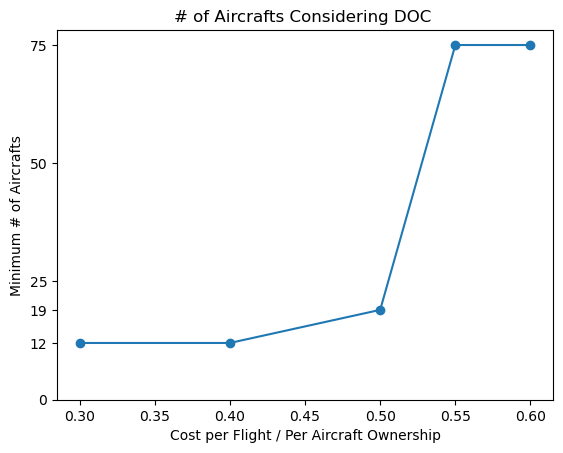

In [22]:
fig, ax = plt.subplots()
ax.plot(cost_ratio, num_aircraft, marker='o')
ax.set(yticks=[0,12,19,25,50,75])
ax.set(xlabel="Cost per Flight / Per Aircraft Ownership",
       ylabel='Minimum # of Aircrafts',
       title='# of Aircrafts Considering DOC ')

# Analysis on Spill

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
import model.queueing_model
importlib.reload(model.queueing_model)
from model.queueing_model import system

------------------------------------------timestep------------------------------------------
Idle aircrafts soc 80, delay 0
Number of aircraft avalibale: 1
Flight demand: 1
NUmber of aircraft departed: 1
Idle aircrafts soc 80, delay 0
Number of aircraft avalibale: 1
Flight demand: 0
NUmber of aircraft departed: 0
1 [1] 0 []
------------------------------------------timestep------------------------------------------
Number of aircraft avalibale: 0
Flight demand: 1
NUmber of aircraft departed: 0
Idle aircrafts soc 80, delay 0
Idle aircrafts soc 70, delay 1
Number of aircraft avalibale: 1
Flight demand: 0
NUmber of aircraft departed: 0
0 [4] 0 []
------------------------------------------timestep------------------------------------------
Number of aircraft avalibale: 0
Flight demand: 1
NUmber of aircraft departed: 0
Idle aircrafts soc 80, delay 0
Idle aircrafts soc 70, delay 0
Number of aircraft avalibale: 2
Flight demand: 1
NUmber of aircraft departed: 1
0 [4] 1 [1]
---------------------

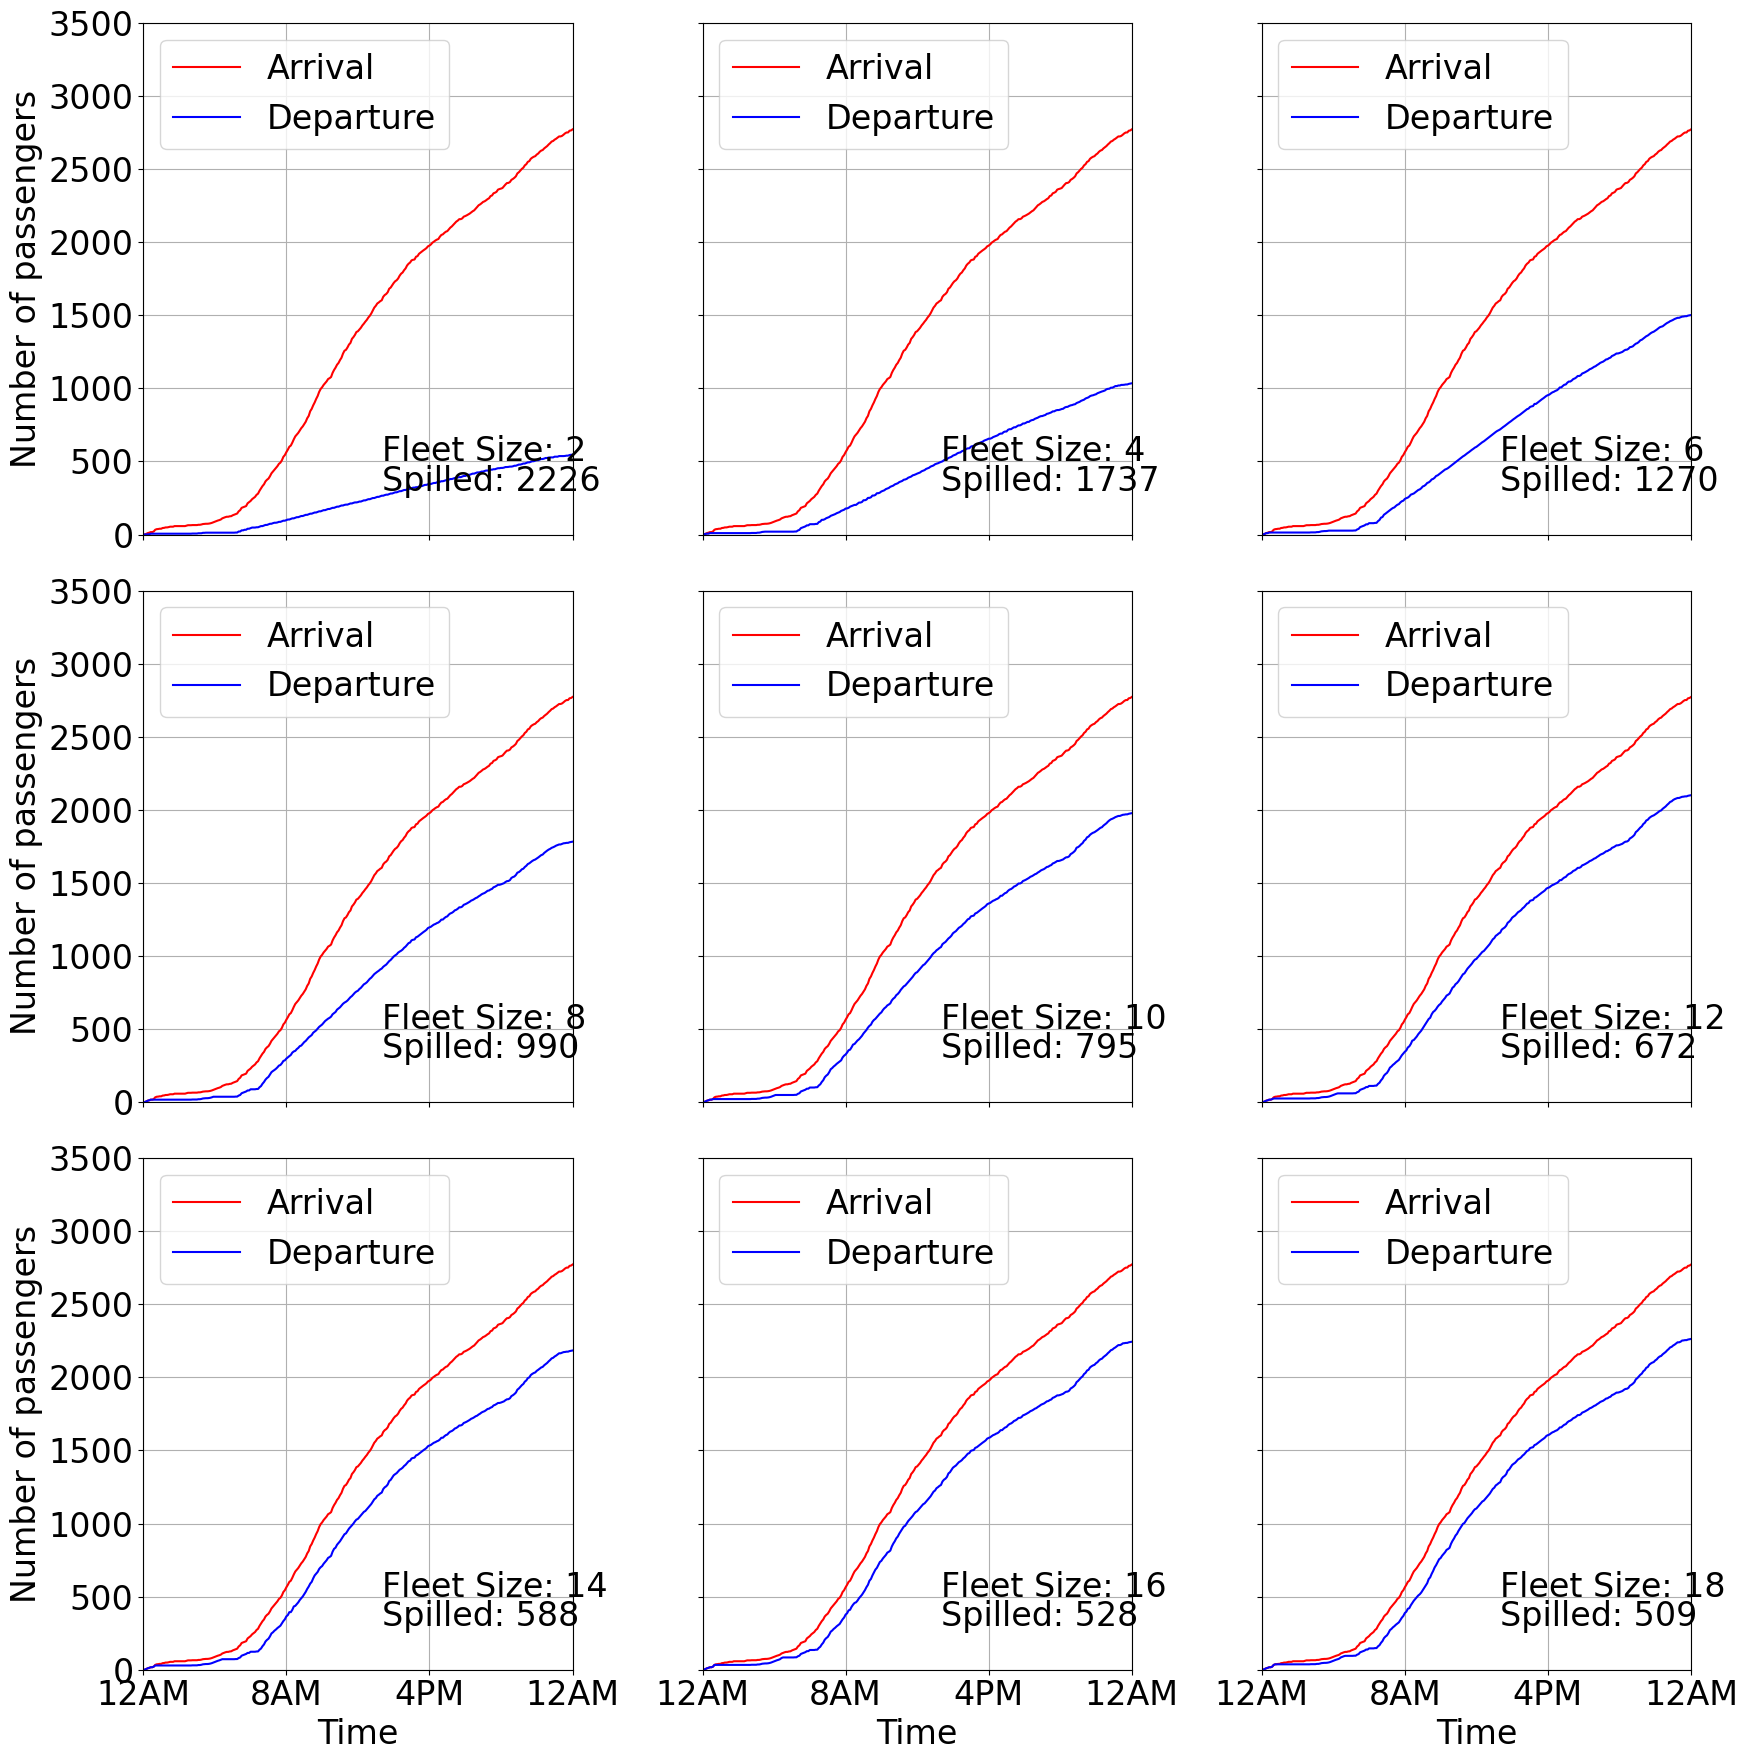

In [137]:
n=2
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18,18))
for i in range(3):
    for j in range(3):
        s = system(n, 'output/demand_variation/schedule/alpha_7/num_pax_1_5.csv', 'output/demand_variation/schedule/alpha_7/1_5.csv')
        s.logger()
        s.plot(ax=ax[i,j])
        n += 2
        ax[i,j].set(title='')
        if j != 0:
            ax[i,j].set(ylabel='', yticklabels=[])
        if i != 2:
            ax[i,j].set(xlabel='', xticklabels=[])
plt.tight_layout()

In [125]:
hhr_warner_energy = pd.read_csv('input/route_profile/hhr_warner_energy.csv').to_numpy()[:,1:]
warner_hhr_energy = pd.read_csv('input/route_profile/warner_hhr_energy.csv').to_numpy()[:,1:]
warner_hhr_flight_duration = pd.read_csv('input/route_profile/warner_hhr_flight_duration.csv').to_numpy()[:,1:]
hhr_warner_flight_duration = pd.read_csv('input/route_profile/hhr_warner_flight_duration.csv').to_numpy()[:,1:]

In [149]:
mag = np.arange(0, 60, 10)
angel = np.arange(0, 360+45, 45)
dist = np.array([[0,30],[30,0]])
fleetsize_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))
num_pads_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))
vertiport_pads_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1], 2))
num_flight_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))
energy_consumption_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))
aircraft_miles_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))
revenue_miles_all = np.zeros((hhr_warner_energy.shape[0], hhr_warner_energy.shape[1]))

In [150]:
for i in range(hhr_warner_energy.shape[0]):
    for j in range(hhr_warner_energy.shape[1]):

        kappa = np.array([[0, hhr_warner_energy[i,j]], [warner_hhr_energy[i,j], 0]])/160*100
        tau = np.array([[0, hhr_warner_flight_duration[i,j]], [warner_hhr_flight_duration[i,j], 0]])
        op = FleetSizeOptimizer(flight_time=tau, energy_consumption=kappa, schedule='schedule_5min_0612.csv')
        op.parse_result(f'HHR_WARNER/wind_variation/mag_{mag[i]}_ang_{angel[j]}.txt')
        op.calculate_aircraft_states()

        fleetsize, num_pads, vertiport_pads, num_flight, energy_consumption, aircraft_miles, revenue_miles = op.get_summary_statistics(dist, True)

        fleetsize_all[i,j] = fleetsize
        num_pads_all[i,j] = num_pads
        vertiport_pads_all[i,j,:] = vertiport_pads
        num_flight_all[i,j] = num_flight
        energy_consumption_all[i,j] = energy_consumption
        aircraft_miles_all[i,j] = aircraft_miles
        revenue_miles_all[i,j] = revenue_miles




Fleet size: 33.0
Total number of pads: 41; [14 27] 
Total number of flights: 958.0; demand: 771.0; repositioning: 187.0
Total energy consumption: 11496.0 kWh
Total aircraft miles: 28740.0 mi
Ratio of revenue aircraft miles to aircraft miles: 0.8048016701461378
Fleet size: 33.0
Total number of pads: 41; [14 27] 
Total number of flights: 958.0; demand: 771.0; repositioning: 187.0
Total energy consumption: 11496.0 kWh
Total aircraft miles: 28740.0 mi
Ratio of revenue aircraft miles to aircraft miles: 0.8048016701461378
Fleet size: 33.0
Total number of pads: 41; [14 27] 
Total number of flights: 958.0; demand: 771.0; repositioning: 187.0
Total energy consumption: 11496.0 kWh
Total aircraft miles: 28740.0 mi
Ratio of revenue aircraft miles to aircraft miles: 0.8048016701461378
Fleet size: 33.0
Total number of pads: 41; [14 27] 
Total number of flights: 958.0; demand: 771.0; repositioning: 187.0
Total energy consumption: 11496.0 kWh
Total aircraft miles: 28740.0 mi
Ratio of revenue aircraft 

FileNotFoundError: [Errno 2] No such file or directory: 'output/HHR_WARNER/wind_variation/mag_40_ang_0.txt'

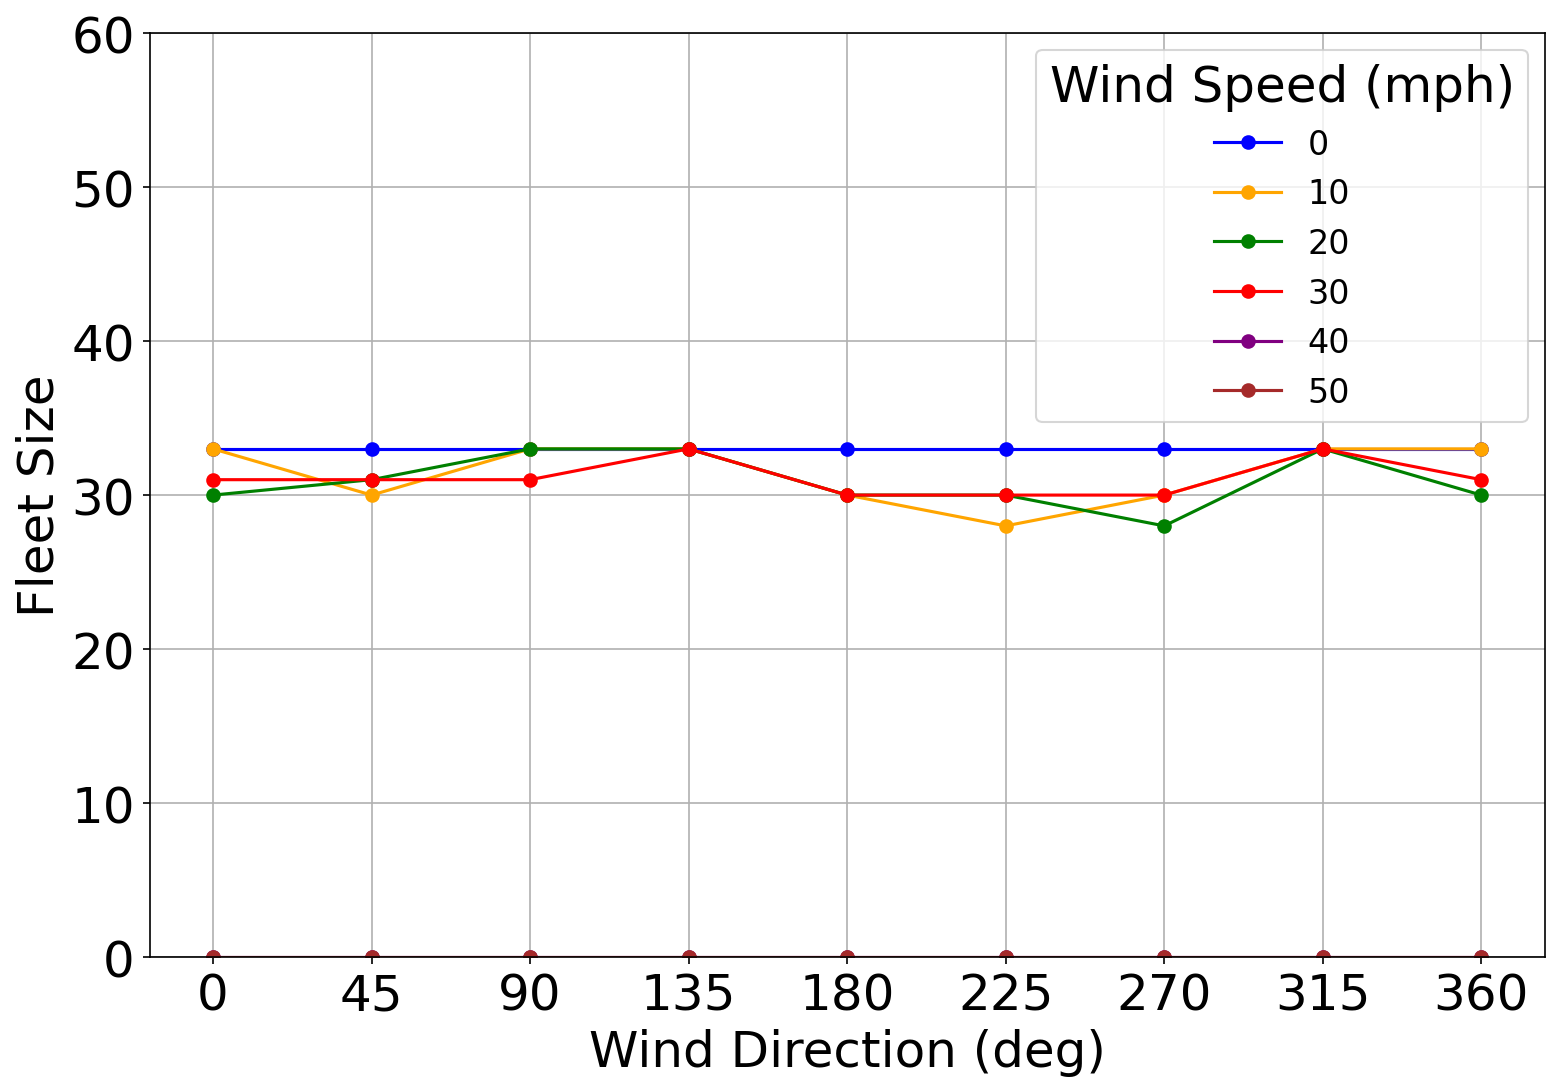

In [153]:
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
fig, ax = plt.subplots(figsize=(12,8), dpi=150)
for i in range(fleetsize_all.shape[0]):
    ax.plot(angel, fleetsize_all[i,:], label=f'{mag[i]}', color=color[i], marker='o')

plt.grid()
plt.legend(title='Wind Speed (mph)', fontsize=16)
ax.set(xlabel='Wind Direction (deg)', ylabel='Fleet Size', ylim=[0, 60],
       xticks=angel);


In [154]:
hhr_warner_energy = pd.read_csv('input/route_profile/hhr_warner_energy.csv').to_numpy()[:,1:]
warner_hhr_energy = pd.read_csv('input/route_profile/warner_hhr_energy.csv').to_numpy()[:,1:]


In [157]:
hhr_warner_flight_duration

array([[20.655, 20.605, 20.646, 20.57 , 20.592, 20.55 , 20.609, 20.488,
        20.699],
       [21.118, 21.517, 21.039, 20.675, 20.155, 19.787, 20.497, 20.602,
        21.083],
       [21.781, 22.444, 21.842, 20.612, 19.786, 19.271, 19.646, 20.689,
        21.911],
       [22.662, 23.781, 22.591, 21.024, 19.462, 18.777, 19.428, 20.998,
        22.579],
       [23.552, 24.395, 23.288, 21.069, 19.163, 18.348, 19.091, 21.204,
        23.694],
       [24.833, 26.278, 24.24 , 21.244, 18.983, 18.068, 19.002, 21.656,
        24.716]])

In [165]:
np.sum(np.array([0.0278,0.03,0.0323])*60)

5.406000000000001

In [163]:
10/160

0.0625